![bike-img](https://storage.googleapis.com/kaggle-competitions/kaggle/3948/logos/front_page.png)  
Data Fields
from [Bike Sharing Demand | Kaggle](https://www.kaggle.com/c/bike-sharing-demand/data)
# Bike Sharing Demand
* Reference
    * corazzon님의 [Github](https://github.com/corazzon/KaggleStruggle)

### Description
* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

### Evaluation
Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE).

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt.rc('font',family='Malgun Gothic')
plt.style.use('ggplot')

mpl.rcParams['axes.unicode_minus'] = False

In [2]:
train = pd.read_csv('data/train.csv', parse_dates=['datetime'])
train.shape

(10886, 12)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


* windspeed가 0으로 나와 있어서 데이터를 추가로 확인함

In [5]:
train.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


* windspeed 데이터가 없는 경우를 0으로 표기한 것으로 보임  
  이 데이터 처리 방안 필요

In [6]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [7]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
import missingno as msno

msno.matrix(train, figsize=(12,5))

ModuleNotFoundError: No module named 'missingno'

In [9]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train.shape

(10886, 18)

In [10]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


[Text(0, 0.5, 'Hour'), Text(0.5, 1.0, '시간별 대여량')]

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


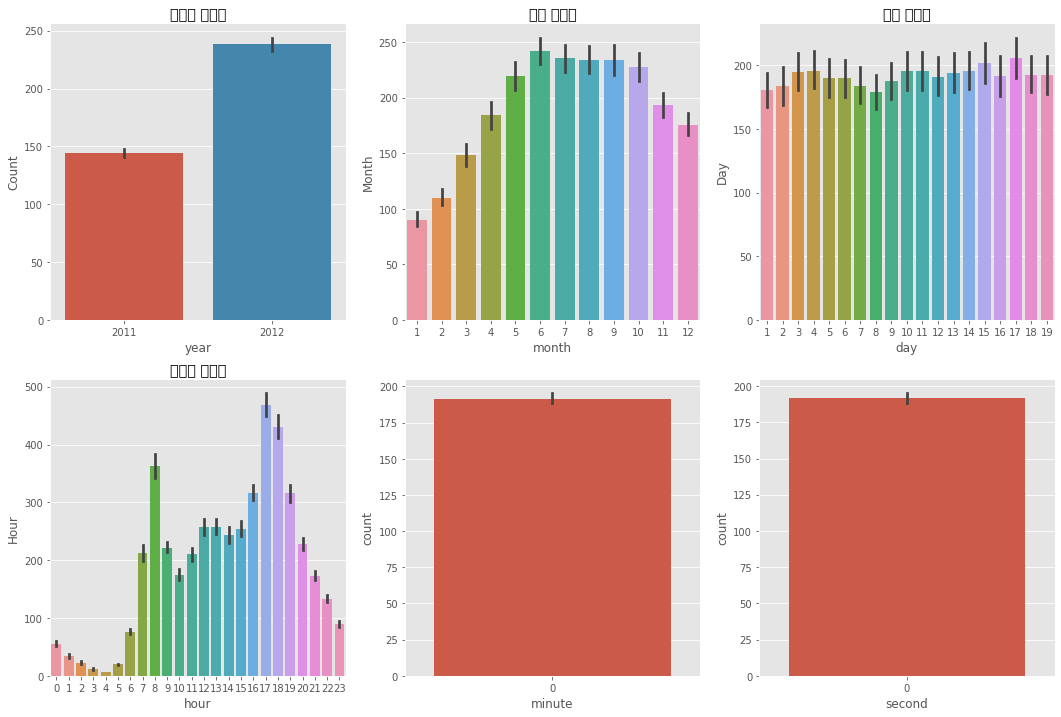

In [11]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,12)

sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)
sns.barplot(data=train, x='day', y='count', ax=ax3)
sns.barplot(data=train, x='hour', y='count', ax=ax4)
sns.barplot(data=train, x='minute', y='count', ax=ax5)
sns.barplot(data=train, x='second', y='count', ax=ax6)

ax1.set(ylabel='Count', title='연도별 대여량')
ax2.set(ylabel='Month', title='월별 대여량')
ax3.set(ylabel='Day', title='일별 대여량')
ax4.set(ylabel='Hour', title='시간별 대여량')

* 연도별 대여량이 2012년에 늘어남
* 계절별 대여량이 차이가 남
* 일별 대여량은 19일까지만 있음(이 이후는 test.csv에 있음)
* 시간별로 출퇴근 시간댕 대여량이 많음(평일, 주말과 나누어서 확인 필요)
* 분, 초는 의미가 없음

[Text(0, 0.5, 'Hour'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, '근무일 여부별 대여량')]

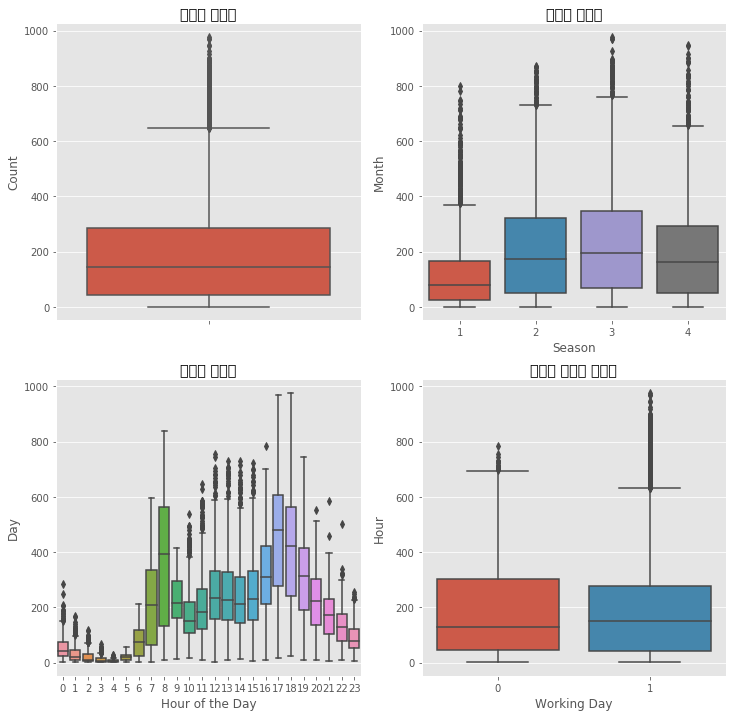

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,12)

sns.boxplot(data=train, y='count', orient='v', ax=axes[0][0])
sns.boxplot(data=train, x='season', y='count', orient='v', ax=axes[0][1])
sns.boxplot(data=train, x='hour', y='count', orient='v', ax=axes[1][0])
sns.boxplot(data=train, x='workingday', y='count', orient='v', ax=axes[1][1])

axes[0][0].set(ylabel='Count', title='연도별 대여량')
axes[0][1].set(xlabel='Season', ylabel='Month', title='계절별 대여량')
axes[1][0].set(xlabel='Hour of the Day', ylabel='Day', title='시간별 대여량')
axes[1][1].set(xlabel='Working Day', ylabel='Hour', title='근무일 여부별 대여량')

In [13]:
train['dayofweek'] = train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [14]:
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

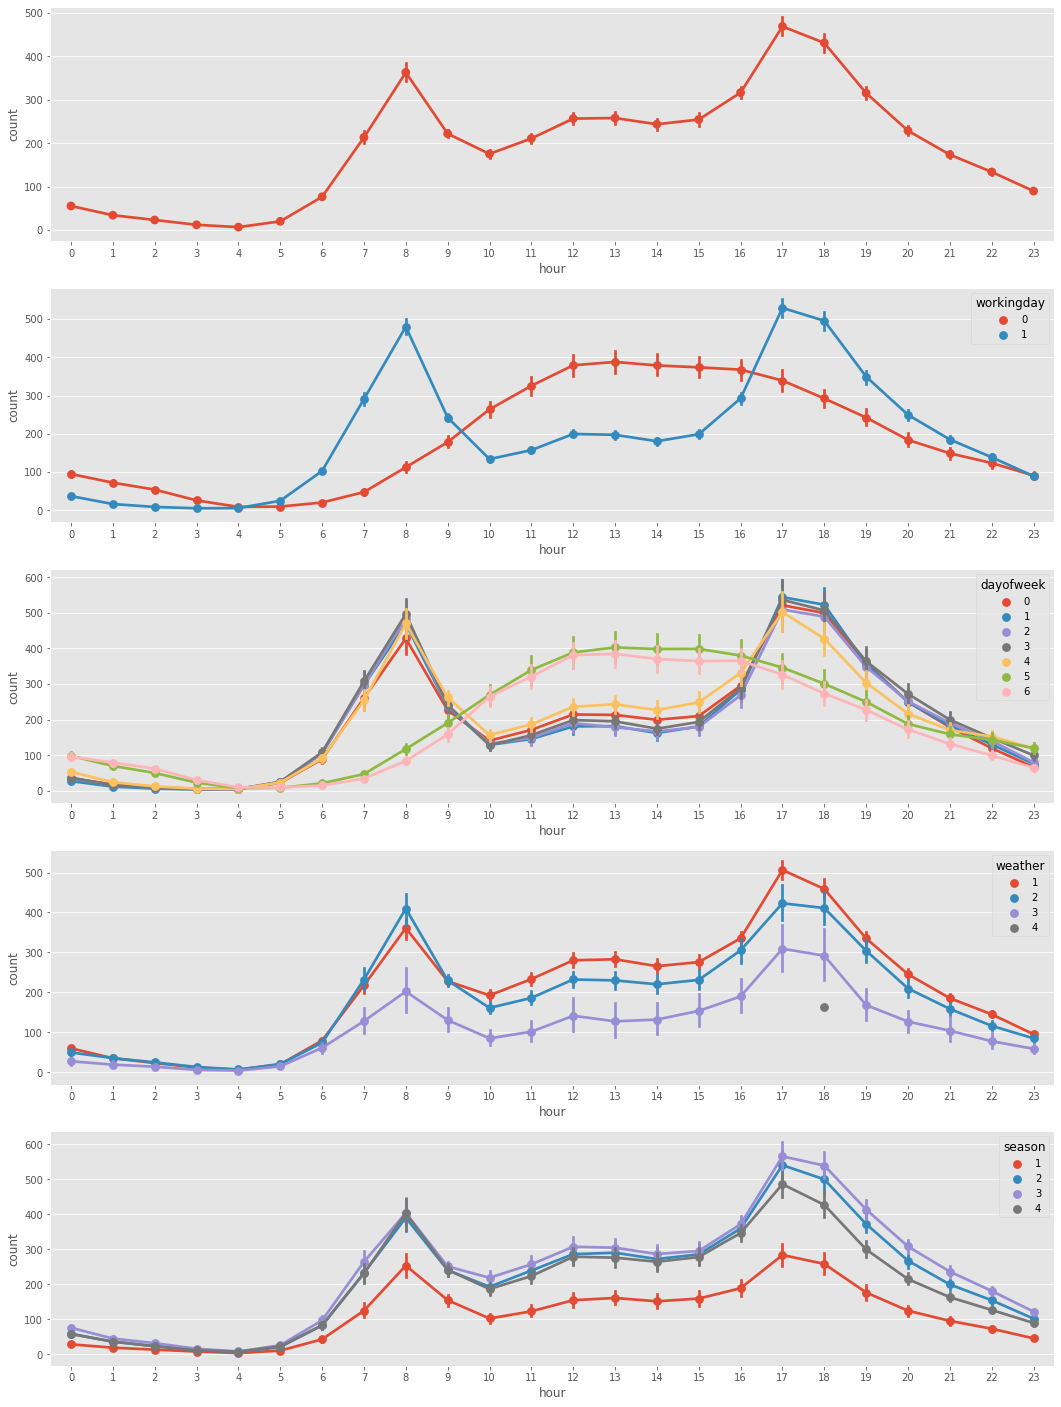

In [15]:
fig, axes = plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=train, x='hour', y='count', ax=axes[0])
sns.pointplot(data=train, x='hour', y='count', hue='workingday', ax=axes[1])
sns.pointplot(data=train, x='hour', y='count', hue='dayofweek', ax=axes[2])
sns.pointplot(data=train, x='hour', y='count', hue='weather', ax=axes[3])
sns.pointplot(data=train, x='hour', y='count', hue='season', ax=axes[4])

In [16]:
corrMatt = train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


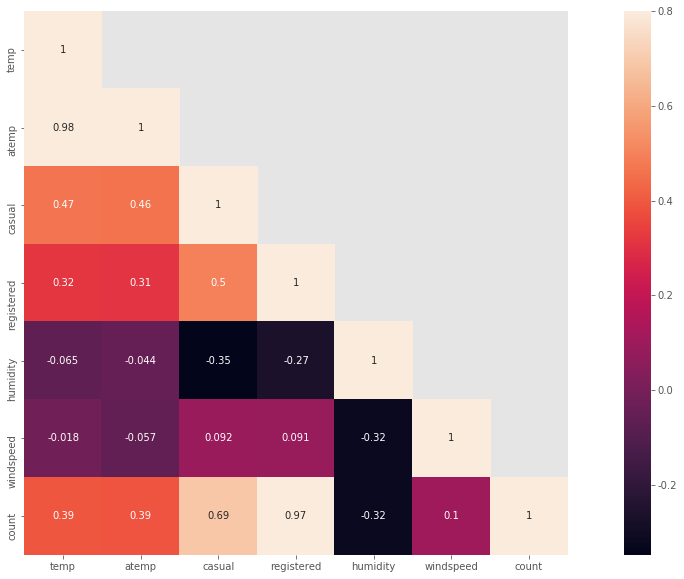

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True,annot=True)

* 등록여부가 대여량과 상관관계가 높지만 test.csv에는 이 항목이 제외됨
* temp와 atemp는 서로 상관관계가 높지만 대여량과의 상관관계는 낮음

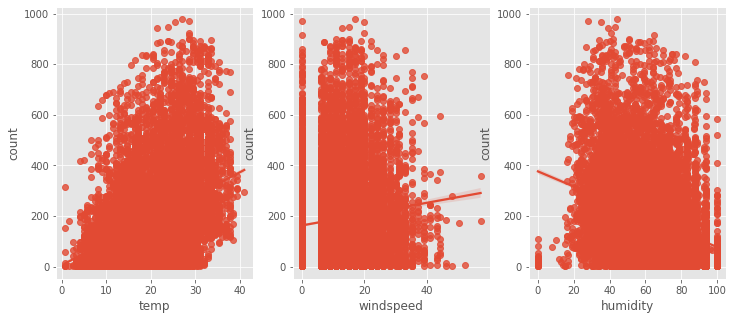

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12,5)

sns.regplot(data=train, x='temp', y='count', ax=ax1)
sns.regplot(data=train, x='windspeed', y='count', ax=ax2)
sns.regplot(data=train, x='humidity', y='count', ax=ax3)

In [19]:
def concat_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train['year_month'] = train['datetime'].apply(concat_year_month)

print(train.shape)

train[['datetime', 'year_month']].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


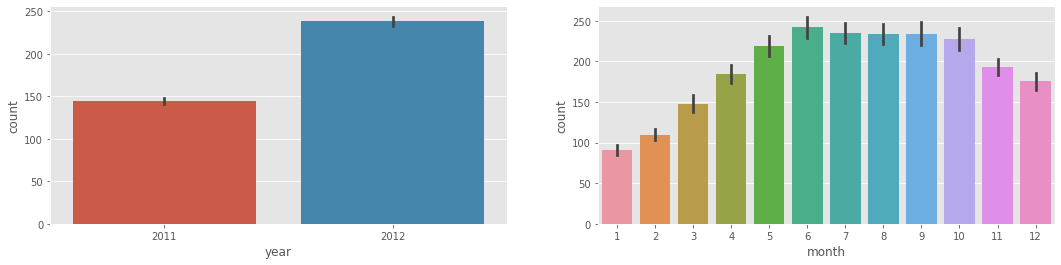

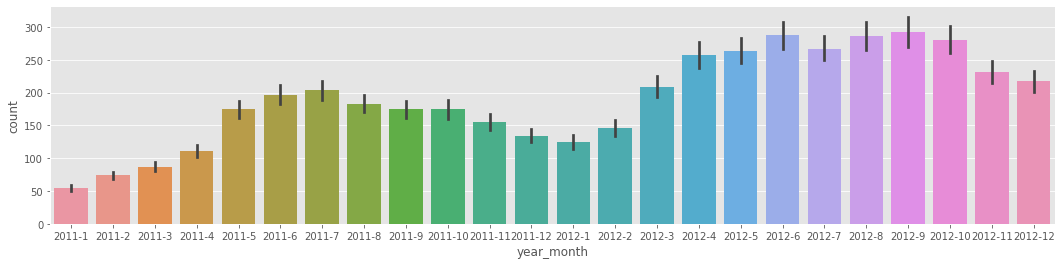

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18,4)

sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)

fig, ax3 = plt.subplots()
fig.set_size_inches(18,4)

sns.barplot(data=train, x='year_month', y='count', ax=ax3)

In [21]:
trainWithoutOutliers = train[np.abs(train['count'] - train['count'].mean()) <= (3*train['count'].std())]

print(train.shape)
print(trainWithoutOutliers.shape)

(10886, 20)
(10739, 20)


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229776, 4.562423868087808, 0.9581176780909612))

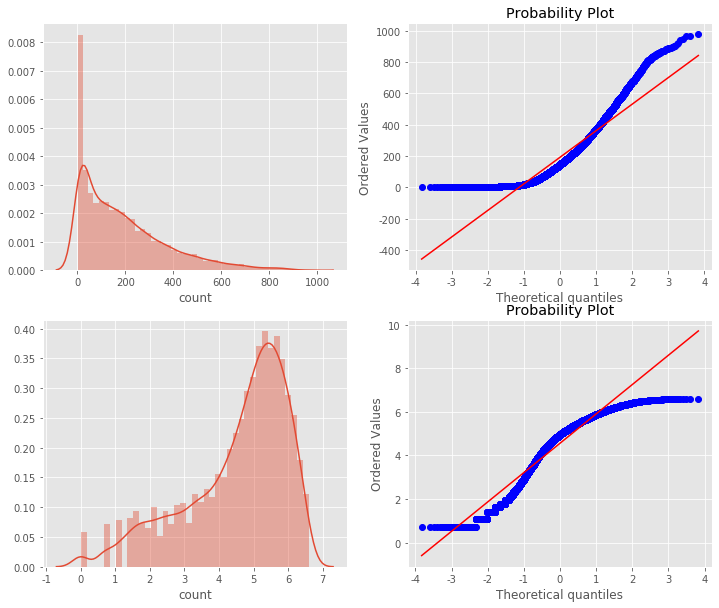

In [22]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)

sns.distplot(train['count'], ax=ax1)
stats.probplot(train['count'], dist='norm', fit=True, plot=ax2)
sns.distplot(np.log(trainWithoutOutliers['count']), ax=ax3)
stats.probplot(np.log1p(trainWithoutOutliers['count']), dist='norm', fit=True, plot=ax4)

* 평가 방법 : RMSLE
* **과대평가된 항목보다는 과소평가된 항목에 패널티를 준다.**  
* 오차를 제곱해서 평균한 값의 제곱근으로 계산하여 값이 작을 수록 정밀도가 높다.  
  0에 가까운 값이 나올 수록 정밀도가 높다.

In [23]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)

    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)

    difference = log_predict - log_actual
    difference = np.square(difference)

    mean_difference = difference.mean()

    score = np.sqrt(mean_difference)

    return score

In [24]:
train = pd.read_csv('data/train.csv', parse_dates=['datetime'])
test = pd.read_csv('data/test.csv', parse_dates=['datetime'])

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['dayofweek'] = train['datetime'].dt.dayofweek
display(train.shape)

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
test['dayofweek'] = test['datetime'].dt.dayofweek
display(test.shape)

(10886, 19)

(6493, 16)

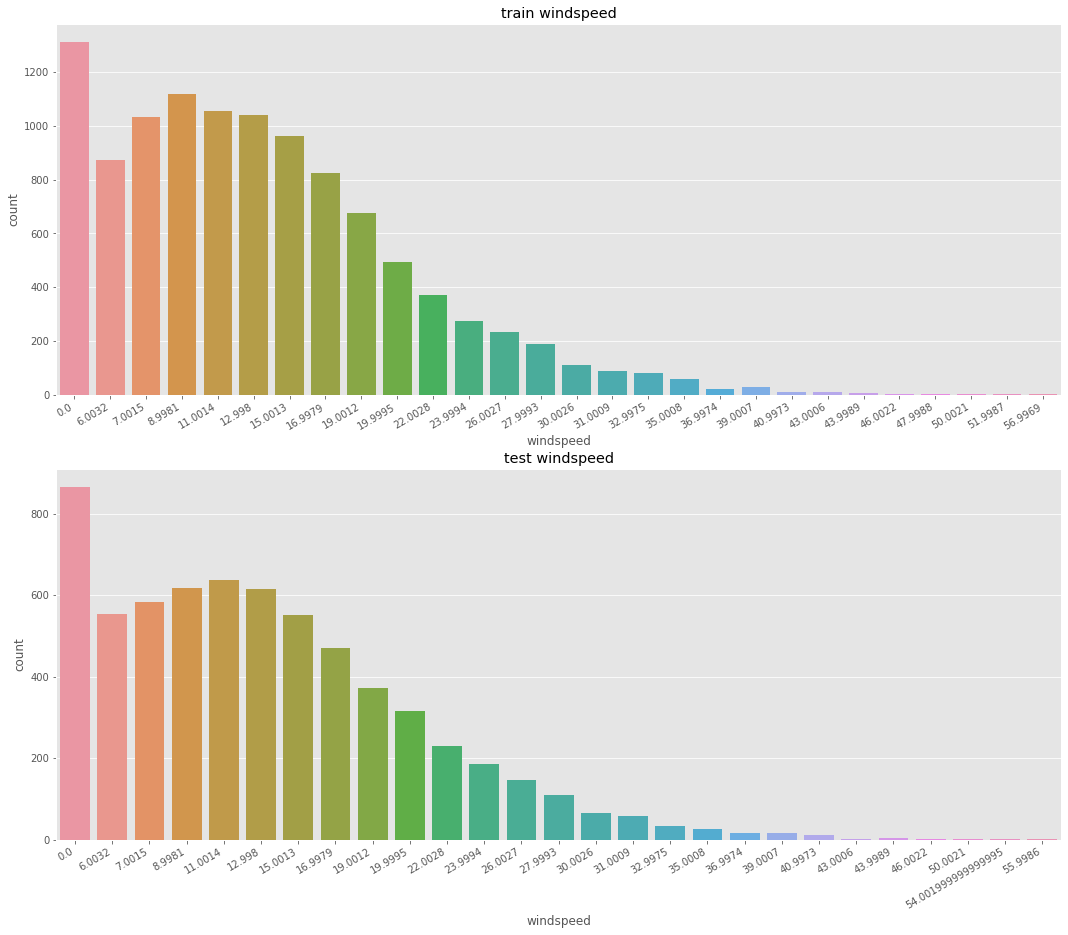

In [25]:
# 풍속 시각화

fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18,15)

plt.sca(axes[0])
plt.xticks(rotation=30, ha='right')
axes[0].set(ylabel='Count', title='train windspeed')
sns.countplot(data=train, x='windspeed', ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].set(ylabel='Count', title='test windspeed')
sns.countplot(data=test, x='windspeed', ax=axes[1])

* train 데이터나 test 데이터의 풍속이 0에 많이 치중해있다.
* 측정이 되지 않은 값들을 0으로 저장한 것으로 보임

In [26]:
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    dataWind0 = data.loc[data['windspeed']==0]
    dataWindNot0 = data.loc[data['windspeed']!=0]

    col = ['season', 'weather', 'humidity', 'month', 'temp', 'year', 'atemp']

    dataWindNot0['windspeed'] = dataWindNot0['windspeed'].astype(str)

    rfModel_wind = RandomForestClassifier()
    rfModel_wind.fit(dataWindNot0[col], dataWindNot0['windspeed'])

    wind0Values = rfModel_wind.predict(X=dataWind0[col])

    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0

    predictWind0['windspeed'] = wind0Values

    data = predictWindNot0.append(predictWind0)

    data['windspeed'] = data['windspeed'].astype(float)

    data.reset_index(drop=True, inplace=True)
    
    return data

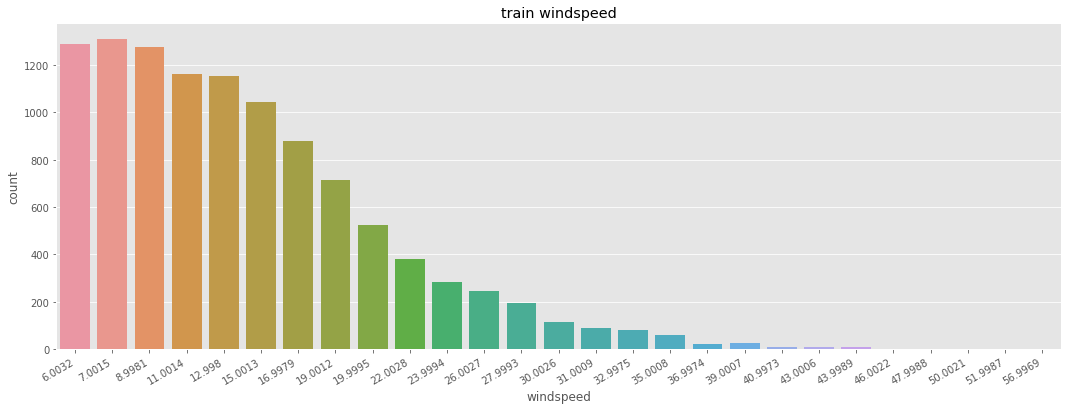

In [27]:
train = predict_windspeed(train)

fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)

plt.sca(ax1)
plt.xticks(rotation=30, ha='right')
ax1.set(ylabel='Count',title="train windspeed")
sns.countplot(data=train, x="windspeed", ax=ax1)

### Feature Selection

In [28]:
categorical_feature_names=['season','holiday','workingday','weather',
                          'dayofweek','month','year','hour']

# one hot encoding
for var in categorical_feature_names:
    train[var] = train[var].astype('category')
    test[var] = test[var].astype('category')
    
train[categorical_feature_names].head()

,season,holiday,workingday,weather,dayofweek,month,year,hour
0,1,0,0,2,5,1,2011,5
1,1,0,0,1,5,1,2011,10
2,1,0,0,1,5,1,2011,11
3,1,0,0,1,5,1,2011,12
4,1,0,0,2,5,1,2011,13


In [29]:
feature_names = ['season','weather','temp','atemp','humidity','windspeed',
               'year','hour','dayofweek','holiday','workingday']

In [30]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,2,9.84,12.880,75,6.0032,2011,5,5,0,0
1,1,1,15.58,19.695,76,16.9979,2011,10,5,0,0
2,1,1,14.76,16.665,81,19.0012,2011,11,5,0,0
3,1,1,17.22,21.210,77,19.0012,2011,12,5,0,0
4,1,2,18.86,22.725,72,19.9995,2011,13,5,0,0


In [31]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,26.0027,2011,0,3,0,1
1,1,1,10.66,13.635,56,0.0000,2011,1,3,0,1
2,1,1,10.66,13.635,56,0.0000,2011,2,3,0,1
3,1,1,10.66,12.880,56,11.0014,2011,3,3,0,1
4,1,1,10.66,12.880,56,11.0014,2011,4,3,0,1


In [32]:
label_name = 'count'

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0     1
1    36
2    56
3    84
4    94
Name: count, dtype: int64

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

from sklearn.ensemble import RandomForestRegressor

max_depth_list=[]
model = RandomForestRegressor(n_estimators=100,
                             n_jobs=-1,
                             random_state=0)
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [34]:
rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [35]:
rmsle

<function __main__.rmsle(predicted_values, actual_values)>

In [36]:
%time score = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()

CPU times: user 4.01 s, sys: 2.53 s, total: 6.54 s
Wall time: 15.4 s


In [37]:
print("Score={0:.5f}".format(score))

Score=0.33061


### Train

In [38]:
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(predictions.shape)
predictions[0:10]

(6493,)


array([ 12.52,   5.03,   4.16,   3.52,   3.15,   6.27,  38.3 , 105.36,
       236.31, 135.22])

[Text(0.5, 1.0, 'test')]

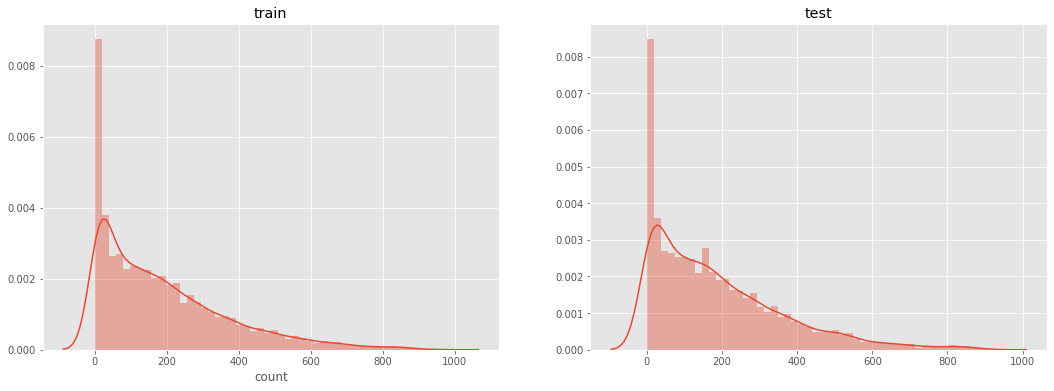

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(18,6)

sns.distplot(y_train, ax=ax1, bins=50)
ax1.set(title='train')

sns.distplot(predictions, ax=ax2, bins=50)
ax2.set(title='test')

### Submit

In [40]:
submission = pd.read_csv('data/sampleSubmission.csv')

submission['count'] = predictions
print(submission.shape)
submission.head(10)

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,12.52
1,2011-01-20 01:00:00,5.03
2,2011-01-20 02:00:00,4.16
3,2011-01-20 03:00:00,3.52
4,2011-01-20 04:00:00,3.15
5,2011-01-20 05:00:00,6.27
6,2011-01-20 06:00:00,38.30
7,2011-01-20 07:00:00,105.36
8,2011-01-20 08:00:00,236.31
9,2011-01-20 09:00:00,135.22


In [41]:
submission.to_csv("output/Score_{0:.5f}_submission.csv".format(score), index=False)

### Linear Regrassion Model

In [46]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values, convertExp=True):

    if convertExp:
        predicted_values = np.exp(predicted_values),
        actual_values = np.exp(actual_values)

    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)

    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)

    difference = log_predict - log_actual
    difference = np.square(difference)

    mean_difference = difference.mean()

    score = np.sqrt(mean_difference)

    return score

In [47]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings

pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

Model = LinearRegression()

y_train_log = np.log1p(y_train)
Model.fit(X_train, y_train_log)

preds = Model.predict(X_train)
print ("RMSLE Value For Linear Regression: ",
       rmsle(np.exp(y_train_log),np.exp(preds), False))

RMSLE Value For Linear Regression:  0.979818957629884


In [48]:
preds

array([2.8222381 , 3.6482924 , 3.57023167, ..., 4.01299747, 5.92557116,
       3.54587115])

### Ridge Regularization Model

In [56]:
ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.01, 0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)

y_train_log = np.log1p(y_train)
grid_ridge_m.fit( X_train, y_train_log )
preds = grid_ridge_m.predict(X_train)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ", 
       rmsle(np.exp(y_train_log),np.exp(preds), False))

{'alpha': 0.01, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.9798189556128093
